<a href="https://colab.research.google.com/github/15483114/trabalho-machine-learning-2-fiap/blob/main/trabalho_final_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivo: criar um pipeline de modelos de regressão e retornar o modelo
com menor valor de RMSE.

O valor tem que ser menor que 55000.
Descrição: Utilizando o dataset housing (em anexo), treine os Random
Forest, XGBoost e LightGBM.

Use a função o GridSearchCV para obter os
melhores parâmetros no conjunto de treino (80%). Otimize apenas
parâmetros em comum entre os três algoritmos.

Use o modelo, e respectivos
parâmetros, que retorna o menor valor de RMSE para o conjunto de teste
(aqui o resultado de RMSE deve ser menor que 55000).
Composição da nota:
- 50% - correta implementação do pipeline e otimização dos modelos.
- 50% - Baseado na performance do conjunto de teste (<55000)
Orientações gerais:
• Deixe o jupyter notebook executado com os resultados aparentes
• Suba o arquivo compactado em formato zip.

# **Importando dataset**

In [ ]:
import pandas as pd

# caminho da Isa

df = pd.read_csv('/content/drive/MyDrive/FIAP/homofóbicos e henrique/machine learning 2/housing.csv')

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
import plotly.express as px
fig = px.imshow(df.corr())
fig.show()

Pela quantidade pequena de variáveis optamos por não usa o PCA para reduzir as dimensionalidade e sim a a matriz de correlação, para evitar perda de informação na criação dos componentes, e aparentemente a maior correlação com a target é de 0.688 da variável median_income.
Testamos remover total_bedrooms por ser muito correlacionada com total_rooms mas os resultados não melhoraram então testamos com todas as variáveis.

# **Tratando missings**

In [ ]:
# Porcentagem de dados faltantes
df.isnull().mean().round(4)*100

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        1.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

Analisando os dados total bedrooms aparentam ser 1/5 do valor de total rooms então vamos preencher os valores faltantes assim

In [ ]:
df2 = df
df2["total_bedrooms"] = df2["total_bedrooms"].fillna(df2["total_rooms"] / 5)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


# **Não considerando latitude e longitude**

Existem 3 variáveis geográficas no dataset, latitude, longitude e ocean_proximity, então parecia redundante utilizar a latitude e longitude.

Fiz alguns testes considerando a clusterização dessas duas variáveis e obtive uma divisão geográfica de norte e sul utilizando o KMeans, testei a nova feature cluster nos modelos e os resultados foram muito ruins, e por isso removi a variável de latitude e longitude e utilizar apenas uma variável geográfica que é ocean_proximity.

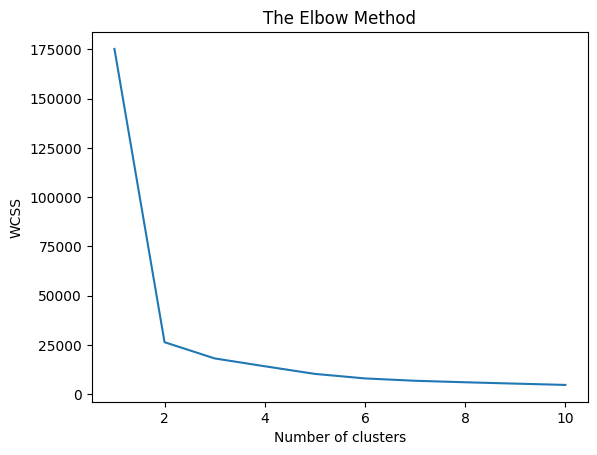

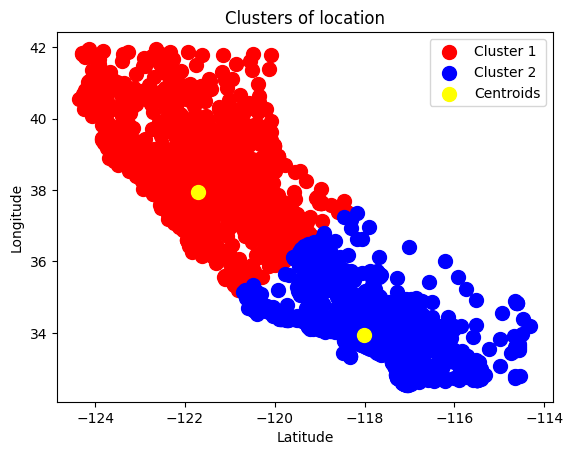

# Fazendo encoding para ocean_proximity

Foi realizada a criação de dummies para a variável ocean_proximity mas os resultados não foram necessariamente melhores, então foi removido o uso de OneHotEncoding e colocado o LabelEncoder que é menos custoso e não é problema para árvores de decisão as quais conseguem lidar com variáveis categóricas.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Aplicar Label Encoding na variável 'ocean_proximity'
df2['ocean_proximity'] = label_encoder.fit_transform(df2['ocean_proximity'])


In [ ]:
s_lat_long = df2

s_lat_long = s_lat_long.drop('longitude', axis=1)
s_lat_long = s_lat_long.drop('latitude', axis =1)
#s_lat_long = s_lat_long.drop('total_bedrooms', axis =1)


In [ ]:
s_lat_long

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


# **Separando target e features**

In [ ]:
from sklearn.model_selection import train_test_split

X = s_lat_long.drop('median_house_value', axis=1)
y = s_lat_long['median_house_value']

X_treino, X_teste,y_treino, y_teste = train_test_split(X,y, test_size=0.2, random_state=42)

Como árvore de decisão/regressão é uma técnica não paramétrica , que não depende do conhecimento da distribuição de probabilidade conhecida foram feitos testes com e sem normalização das variáveis preditoras, e por fim os resultados sem normalização foram melhores.

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_treino, y_treino)

RandomForestRegressor()

In [ ]:
y_pred = regressor.predict(X_teste)

In [ ]:
import math
import numpy as np

MSE = np.square(np.subtract(y_teste,y_pred)).mean()

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

61098.91058285384


Com todas as variaveis menos latitude e longitude

Root Mean Square Error:

104224.0810218162

sem latitude longitude households e total_bedrooms

Root Mean Square Error:

110878.46620600729

Removendo islands do dataset

Root Mean Square Error:

103822.5791903684

sem normalização e sem dummies

Root Mean Square Error:

45717.67649048425

# **XGBoost**

In [ ]:
from xgboost import XGBRegressor
classifier = XGBRegressor()
classifier.fit(X_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred = classifier.predict(X_teste)

In [ ]:
import math
import numpy as np

MSE = np.square(np.subtract(y_teste,y_pred)).mean()

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

62118.88121541012


Com todas as variaveis menos latitude e longitude

Root Mean Square Error:

61488.31595272967

sem latitude longitude households e total_bedrooms

Root Mean Square Error:

67599.81385330061

Removendo islands do dataset

Root Mean Square Error:

65066.45641826281

# **Light GBM**

In [ ]:
#importando os pacotes necessários
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from pandas import DataFrame
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")



params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rate': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}

lgb_train = lgb.Dataset(X_treino, y_treino) #dados que serão usados para treino do modelo
lgb_test = lgb.Dataset(X_teste, y_teste, reference=lgb_train) #dados que serão usados para teste do modelo treinado
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_test,
                 early_stopping_rounds=30)

[LightGBM] [Warning] Unknown parameter: learnnig_rate
[1]	valid_0's l1: 85881.7	valid_0's l2: 1.19557e+10
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 81508.3	valid_0's l2: 1.08162e+10
[3]	valid_0's l1: 77637.2	valid_0's l2: 9.88654e+09
[4]	valid_0's l1: 74374.6	valid_0's l2: 9.11093e+09
[5]	valid_0's l1: 71479.4	valid_0's l2: 8.47895e+09
[6]	valid_0's l1: 68971.4	valid_0's l2: 7.94851e+09
[7]	valid_0's l1: 66767.3	valid_0's l2: 7.50518e+09
[8]	valid_0's l1: 64783	valid_0's l2: 7.13656e+09
[9]	valid_0's l1: 63195	valid_0's l2: 6.8317e+09
[10]	valid_0's l1: 61679.9	valid_0's l2: 6.56445e+09
[11]	valid_0's l1: 60438.9	valid_0's l2: 6.35109e+09
[12]	valid_0's l1: 59305.8	valid_0's l2: 6.15294e+09
[13]	valid_0's l1: 58174.9	valid_0's l2: 5.97855e+09
[14]	valid_0's l1: 57222.4	valid_0's l2: 5.82923e+09
[15]	valid_0's l1: 56423.9	valid_0's l2: 5.7081e+09
[16]	valid_0's l1: 55758.4	valid_0's l2: 5.59909e+09
[17]	valid_0's l1: 55010.7	valid_0's l2: 5.49181e+09

In [ ]:
# agora podemos obter as métricas
y_pred = model.predict(X_teste)

# accuracy check
mse = mean_squared_error(y_teste, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

MSE: 3887726254.93
RMSE: 62351.63


MSE: 2824535892.24
RMSE: 53146.36

MSE: 3730695463.93
RMSE: 61079.42

removendo islands do dataset

RMSE: 63990.31

In [ ]:
from lightgbm import LGBMRegressor

regressor = LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=100,
    random_state=42
)

regressor.fit(X_treino, y_treino)
y_pred = regressor.predict(X_teste)
mse = mean_squared_error(y_teste, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

MSE: 3798980819.81
RMSE: 61635.87


# **GridSearch**

No grid search será testado os parâmetros em comum: n_estimators, max_depth, min_samples_split e min_samples_leaf

# Random Forest

In [ ]:
def grid_search_rf(params, reg=RandomForestRegressor(random_state=2)):

    grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

    grid_reg.fit(X_treino, y_treino)

    best_params = grid_reg.best_params_

    print("Best params:", best_params)

    best_score = np.sqrt(-grid_reg.best_score_)

    print("Training score: {:.3f}".format(best_score))

    y_pred = grid_reg.predict(X_teste)

    rmse_test = mean_squared_error(y_teste, y_pred)**0.5

    print('Test score: {:.3f}'.format(rmse_test))

In [ ]:
grid_search_rf(params={'max_depth':[None,2,3,4,6,8],'min_samples_leaf':[2,4,6,8], 'n_estimators':[None, 5,10,20,50,100], 'min_samples_split':[None,2,3,4,6,8,10]})

Best params: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Training score: 61456.967
Test score: 62342.141


Com todas as variaveis menos latitude e longitude

Root Mean Square Error:

61215.260

sem latitude longitude households e total_bedrooms

Root Mean Square Error:

110878.46620600729

tirando o island do dataset

63837.927

# XGBoost

In [ ]:
def grid_search_xg(params, reg=XGBRegressor(random_state=2)):

    grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

    grid_reg.fit(X_treino, y_treino)

    best_params = grid_reg.best_params_

    print("Best params:", best_params)

    best_score = np.sqrt(-grid_reg.best_score_)

    print("Training score: {:.3f}".format(best_score))

    y_pred = grid_reg.predict(X_teste)

    rmse_test = mean_squared_error(y_teste, y_pred)**0.5

    print('Test score: {:.3f}'.format(rmse_test))

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search_xg(params={'max_depth':[None,2,3,4,6,8],'min_samples_leaf':[2,4,6,8], 'n_estimators':[None, 5,10,20,50,100], 'min_samples_split':[None,2,3,4,6,8,10]})

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
Best params: {'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': None, 'n_estimators': 100}
Training score: 60280.950
Test score: 60933.241


[14:52:30] WARNING: ../src/learner.cc:767:
Parameters: { "min_samples_leaf" } are not used.

Best params: {'min_samples_leaf': 1}
Training score: 61740.429
Test score: 61488.316

removendo island do dataset

Training score: 65970.372
Test score: 64531.028

[19:54:18] WARNING: ../src/learner.cc:767:
Parameters: { "min_samples_leaf" } are not used.

Best params: {'max_depth': 3, 'min_samples_leaf': 1}
Training score: 65970.372
Test score: 64531.028

Testando XGBoost com os parametros obtidos

In [ ]:
from xgboost import XGBRegressor
classifier = XGBRegressor(max_depth = 3, n_estimators = 200,random_state=42)
classifier.fit(X_treino, y_treino)

y_pred = classifier.predict(X_teste)

import math
import numpy as np

MSE = np.square(np.subtract(y_teste,y_pred)).mean()

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

[19:18:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

Root Mean Square Error:

61254.72897821753


[18:23:16] WARNING: ../src/learner.cc:767:
Parameters: { "min_samples_leaf" } are not used.

Root Mean Square Error:

60268.882082802425

# **Light GBM**

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
def grid_search(params, reg=LGBMRegressor(random_state=2)):

    grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

    grid_reg.fit(X_treino, y_treino)

    best_params = grid_reg.best_params_

    print("Best params:", best_params)

    best_score = np.sqrt(-grid_reg.best_score_)

    print("Training score: {:.3f}".format(best_score))

    y_pred = grid_reg.predict(X_teste)

    rmse_test = mean_squared_error(y_teste, y_pred)**0.5

    print('Test score: {:.3f}'.format(rmse_test))

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search(params={'max_depth':[None,2,3,4,6,8],'min_samples_leaf':[2,4,6,8], 'n_estimators':[None, 5,10,20,50,100], 'min_samples_split':[None,2,3,4,6,8,10] })

Best params: {'max_depth': 3, 'n_estimators': 200}
Training score: 61750.013
Test score: 61773.185


In [ ]:
from lightgbm import LGBMRegressor

regressor = LGBMRegressor(
    boosting_type='gbdt',
    min_samples_leaf=6,
    max_depth=None,
    n_estimators=150
)

regressor.fit(X_treino, y_treino)
y_pred = regressor.predict(X_teste)
mse = mean_squared_error(y_teste, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
MSE: 3673873491.12
RMSE: 60612.49


# **Resultados 1**

Pelos resultados obtidos pelo grid search notamos que é preciso tomar uma abordagem diferente. Inicialmente, consideramos que a latitude e longitude não eram variáveis numéricas e sim categóricas por representarem um lugar no espaço. Mas como estamos utilizando de árvore de regressão é possível que os modelos consigam utilizar a latitude e longitude em sua forma original para melhor predizer o valor das casas, então a partir daqui iremos utilizar todos os dados do dataset.

In [ ]:
df3 = df
df3["total_bedrooms"] = df3["total_bedrooms"].fillna(df3["total_rooms"] / 5)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Aplicar Label Encoding na variável 'ocean_proximity'
df3['ocean_proximity'] = label_encoder.fit_transform(df3['ocean_proximity'])

In [ ]:
from sklearn.model_selection import train_test_split

X = df3.drop('median_house_value', axis=1)
y = df3['median_house_value']

X_treino, X_teste,y_treino, y_teste = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import math
import numpy as np

regressor = RandomForestRegressor(max_depth= None, min_samples_leaf= 4, min_samples_split= 10, n_estimators= 100)
regressor.fit(X_treino, y_treino)
y_pred = regressor.predict(X_teste)

MSE = np.square(np.subtract(y_teste,y_pred)).mean()

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

50185.48771020145


In [ ]:
from xgboost import XGBRegressor
classifier = XGBRegressor()
classifier.fit(X_treino, y_treino)
y_pred = classifier.predict(X_teste)
import math
import numpy as np

MSE = np.square(np.subtract(y_teste,y_pred)).mean()

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

47792.667732320915


In [ ]:
from lightgbm import LGBMRegressor

regressor = LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=100,
    random_state=42
)

regressor.fit(X_treino, y_treino)
y_pred = regressor.predict(X_teste)
mse = mean_squared_error(y_teste, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

MSE: 2542849138.62
RMSE: 50426.67


# **Resultado 2**

Dos modelos o melhor resultado foi obtido com XGBoost com RMSE de:

47792.667732320915